In [1]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt
from rpn.rpn_multi import MultiRPN
from pathlib import Path
import numpy as np

In [4]:
ls

check_outputs.ipynb


In [11]:
folder = Path("/RECH2/huziy/coupling/tests/coupled-GL-perftest_197901.bak")
path_list = [str(f) for f in folder.iterdir() if f.name.startswith("pm") and not f.name[:-1].endswith(8 * "0")]
    

In [12]:
# NEM2 - lake surface temperature (ice)
# NEM3 - lake ice fraction
# NEM4 - visible lake surface albedo
# NEM5 - lake ice thickness
# NEM6 - lake snow thickness
# NEM7 - runoff multiplier 
# NEM8 - runoff for NEMO
vname = "NEM2"
r = MultiRPN(path_list)

In [33]:
lkice_fr = r.get_all_time_records_for_name_and_level(varname="NEM3")
lkice_temp = r.get_all_time_records_for_name_and_level(varname="NEM2")
lkwat_temp = r.get_all_time_records_for_name_and_level(varname="NEM1")

In [15]:
dates = list(sorted(lkice_fr.keys()))

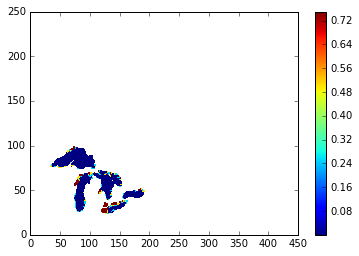

In [40]:
d = dates[100]

to_plot = np.ma.masked_where(lkice_fr[d] < 0, lkice_fr[d])

im = plt.pcolormesh(to_plot.T)
plt.colorbar(im)

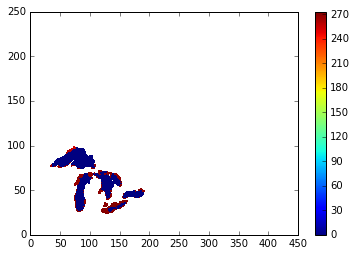

In [42]:
to_plot = np.ma.masked_where(lkice_fr[d] < 0, lkice_temp[d])

im = plt.pcolormesh(to_plot.T)
plt.colorbar(im)

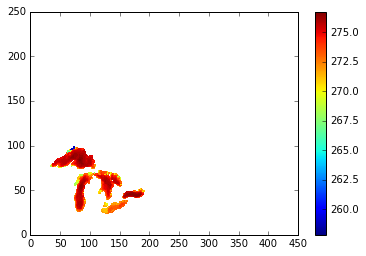

In [43]:
# Lake surface temperature
to_plot = np.ma.masked_where(lkice_fr[d] < 0, lkwat_temp[d] * (1 - lkice_fr[d]) + lkice_temp[d] * lkice_fr[d])

im = plt.pcolormesh(to_plot.T)
plt.colorbar(im)